In [1]:
import pandas as pd
import numpy as np

# In Python, the glob module is used to find all the pathnames matching a specified pattern according to the rules used by the Unix shell. 
# It is particularly useful for searching for files with specific extensions or names in a directory.
# for example, if you want to get all the .txt files in a directory, you can use the following code: txt_files = glob.glob('*.txt')
from glob import glob

import matplotlib.pyplot as plt
import cv2

## 1. Reading Image

- data is download from https://www.kaggle.com/code/robikscube/working-with-image-data-in-python/input?select=training_set
- Image read as np Array in the format: height, width, channels

In [2]:
dog_files = glob("data/test_set/dogs\\dog.*.jpg")
cat_files = glob("data/test_set/cats\\cat.*.jpg")

### 1.1 Understand the np.array of the image, using matplot

In [3]:
image_mpl = plt.imread(cat_files[0])

print("type of image_mpl", type(image_mpl))
print("shape of image_mpl", image_mpl.shape)
image_mpl

type of image_mpl <class 'numpy.ndarray'>
shape of image_mpl (415, 498, 3)


array([[[ 12,  14,   9],
        [  3,   0,   0],
        [ 22,   5,  15],
        ...,
        [  3,   0,   0],
        [  2,   0,   3],
        [  1,   1,   3]],

       [[  0,   1,   0],
        [ 11,   7,   6],
        [107,  90,  98],
        ...,
        [ 88,  83,  87],
        [  2,   0,   3],
        [  1,   1,   3]],

       [[ 11,  12,   6],
        [ 16,  11,   8],
        [116,  99, 105],
        ...,
        [ 65,  60,  64],
        [  2,   0,   3],
        [  1,   1,   3]],

       ...,

       [[  0,   6,   6],
        [  7,  11,  12],
        [ 89,  87,  90],
        ...,
        [ 50,  52,  49],
        [  1,   1,   1],
        [  1,   1,   3]],

       [[  2,  12,  11],
        [  0,   3,   2],
        [ 10,  11,  13],
        ...,
        [  0,   2,   0],
        [  1,   1,   1],
        [  1,   1,   3]],

       [[  0,   4,   0],
        [  0,  11,   7],
        [  0,   1,   0],
        ...,
        [  3,   8,   4],
        [  1,   1,   1],
        [  1,   1,   3]]

- [ 12,  14,   9] is the first pixel of that image. three lists represent red, green, blue intensity in that pixel
- [[ 12,  14,   9], [  3,   0,   0], [ 22,   5,  15], ..., [  3,   0,   0], [  2,   0,   3], [  1,   1,   3]], is the first row of the pixels of that image
- as the shape is 415*489, it means there is 415 rows of the pixels, and each row has 489 columns of the pixels

In [4]:
print("shape of the first row ", image_mpl[0].shape)
image_mpl[0]

shape of the first row  (498, 3)


array([[12, 14,  9],
       [ 3,  0,  0],
       [22,  5, 15],
       ...,
       [ 3,  0,  0],
       [ 2,  0,  3],
       [ 1,  1,  3]], dtype=uint8)

In [5]:
print("shape of the first pixel ", image_mpl[0][0].shape)
image_mpl[0][0]

shape of the first pixel  (3,)


array([12, 14,  9], dtype=uint8)

### 1.2 Understand the np.array of the image, using cv2

- Importantly, the value of the color channel is different between matplot and cv2d
    - matplot read as RED, GREEN, BLUE 
    - cv2 reads as BLUE, GREEN, RED

In [6]:
image_cv = cv2.imread(cat_files[0])

print("type of image_cv", type(image_cv))
print("shape of image_cv", image_cv.shape)
image_cv

type of image_cv <class 'numpy.ndarray'>
shape of image_cv (415, 498, 3)


array([[[  9,  14,  12],
        [  0,   0,   3],
        [ 15,   5,  22],
        ...,
        [  0,   0,   3],
        [  3,   0,   2],
        [  3,   1,   1]],

       [[  0,   1,   0],
        [  6,   7,  11],
        [ 98,  90, 107],
        ...,
        [ 87,  83,  88],
        [  3,   0,   2],
        [  3,   1,   1]],

       [[  6,  12,  11],
        [  8,  11,  16],
        [105,  99, 116],
        ...,
        [ 64,  60,  65],
        [  3,   0,   2],
        [  3,   1,   1]],

       ...,

       [[  6,   6,   0],
        [ 12,  11,   7],
        [ 90,  87,  89],
        ...,
        [ 49,  52,  50],
        [  1,   1,   1],
        [  3,   1,   1]],

       [[ 11,  12,   2],
        [  2,   3,   0],
        [ 13,  11,  10],
        ...,
        [  0,   2,   0],
        [  1,   1,   1],
        [  3,   1,   1]],

       [[  0,   4,   0],
        [  7,  11,   0],
        [  0,   1,   0],
        ...,
        [  4,   8,   3],
        [  1,   1,   1],
        [  3,   1,   1]]

- Similar to matplot, cv also reads the image into an np array with the size as height*width*channel

In [7]:
print("shape of the first row ", image_cv[0].shape)
image_cv[0]

shape of the first row  (498, 3)


array([[ 9, 14, 12],
       [ 0,  0,  3],
       [15,  5, 22],
       ...,
       [ 0,  0,  3],
       [ 3,  0,  2],
       [ 3,  1,  1]], dtype=uint8)

In [8]:
print("shape of the first pixel ", image_cv[0][0].shape)
image_cv[0][0]

shape of the first pixel  (3,)


array([ 9, 14, 12], dtype=uint8)

### 1.3 Flatten the np array to read the histgram

- it shows the pixel value distribution for this picture

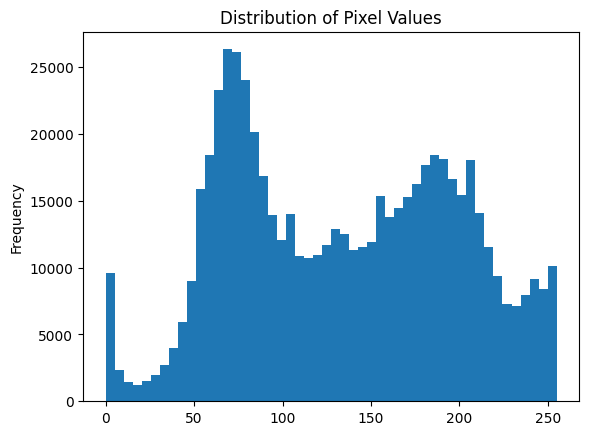

In [9]:
pd.Series(image_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

## 2. Display the image

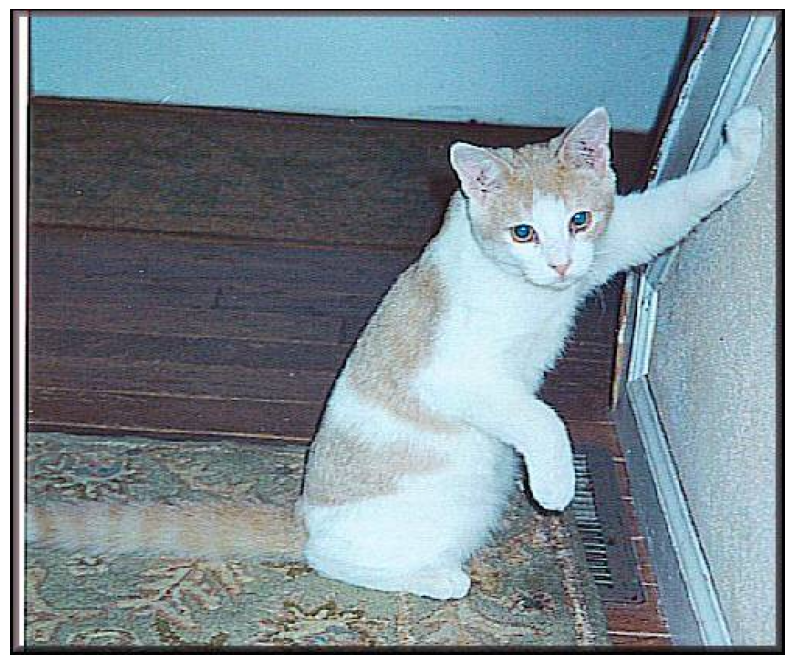

In [13]:
## Display the image using matplotlib, so we use image_mpl and plt.imshow()

## fix the size of the figure to 10x10 inches, to make the image consistent

fig, ax = plt.subplots(figsize=(10, 10)) # Create an empty figure with empty subplots - the size is in inches (width, height) 10x10

ax.imshow(image_mpl) # Display an image on the axes
ax.axis('off') # Turn off the axis
plt.show()

## 3. understand the color channel

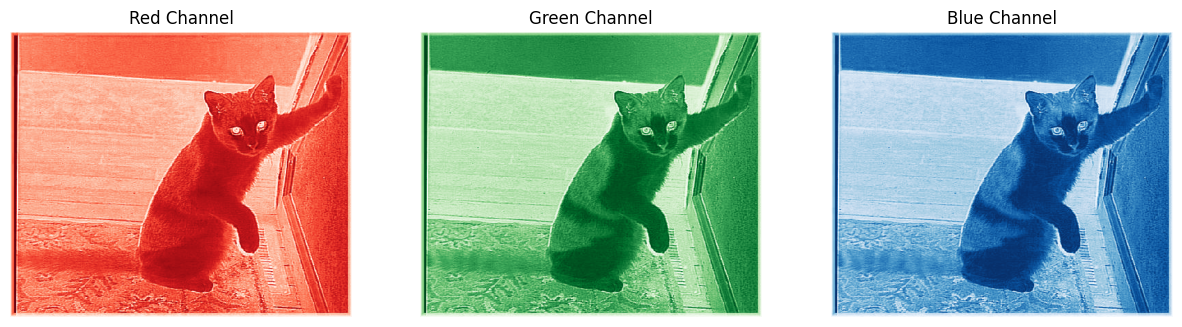

In [14]:
# display RGB channels - using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5)) # Create an empty figure with 3 subplots - the size is in inches (width, height) 15x5
ax[0].imshow(image_mpl[:, :, 0], cmap='Reds') # Display the red channel
ax[0].axis('off') # Turn off the axis
ax[0].set_title('Red Channel') # Set the title of the subplot

ax[1].imshow(image_mpl[:, :, 1], cmap='Greens') # Display the green channel
ax[1].axis('off') # Turn off the axis
ax[1].set_title('Green Channel') # Set the title of the subplot

ax[2].imshow(image_mpl[:, :, 2], cmap='Blues') # Display the blue channel
ax[2].axis('off') # Turn off the axis
ax[2].set_title('Blue Channel') # Set the title of the subplot

plt.show()

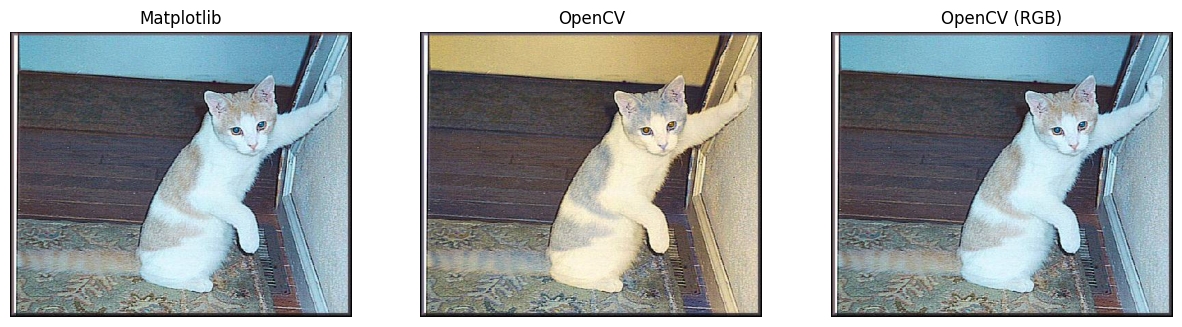

In [18]:
# compare opencv and matplotlib, as the opencv uses BGR instead of RGB

fig, ax = plt.subplots(1, 3, figsize=(15, 5)) # Create an empty figure with 2 subplots - the size is in inches (width, height) 10x5

ax[0].imshow(image_mpl) # Display the image using matplotlib
ax[0].axis('off') # Turn off the axis
ax[0].set_title('Matplotlib') # Set the title of the subplot

ax[1].imshow(image_cv) # Display the image using opencv
ax[1].axis('off') # Turn off the axis
ax[1].set_title('OpenCV') # Set the title of the subplot

ax[2].imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)) # Display the image using opencv and convert the color from BGR to RGB
ax[2].axis('off') # Turn off the axis
ax[2].set_title('OpenCV (RGB)') # Set the title of the subplot

plt.show()
